In [ ]:
%pip install plotly
%pip install geopandas matplotlib
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


^C
Note: you may need to restart the kernel to use updated packages.


KeyboardInterrupt




[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime


# Uncover What's Hot in Online Shopping: A Data-Driven Adventure

**Hey there! Curious about what makes online shoppers tick? This notebook dives into a pile of online shopping data to reveal hidden trends and pattern.**

**We'll uncover:**

* The most popular products: What's flying off the digital shelves?
* When people shop: Are there certain times or months when sales go crazy?
* Where shoppers come from: Which countries are the biggest online spenders?
* Who the most loyal customers are: Who keeps coming back for more?

**Get ready to:**

* See cool charts and graphs that show shopping patterns in a whole new light.
* Learn how to use data to understand what customers want.
* Discover ways to make online stores even better.
* Share your ideas with other Kaggle members and see what they think!

**Whether you're a pro at data or just starting out, come explore the world of online shopping with us!**

In [ ]:
df=pd.read_csv('online_retail.csv')
df

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [ ]:
df.describe()

,index,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000,406829.000000
mean,270954.000000,9.552250,4.611114,15287.690570
std,156435.797851,218.081158,96.759853,1713.600303
min,0.000000,-80995.000000,-11062.060000,12346.000000
25%,135477.000000,1.000000,1.250000,13953.000000
50%,270954.000000,3.000000,2.080000,15152.000000
75%,406431.000000,10.000000,4.130000,16791.000000
max,541908.000000,80995.000000,38970.000000,18287.000000


In [ ]:
df.isna().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### There are lots of missing values in Customer ID 

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(columns=['index'],inplace=True)

In [ ]:
len(df['Description'].unique())

4224

#### There are 4224 unique products in our data

## Most buyed Product Analysis

In [ ]:
Most_buyed_product=df.groupby(by='Description').agg({'Quantity':'sum'}).sort_values(by='Quantity',ascending=False).reset_index().head(15)
Most_buyed_product

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1,JUMBO BAG RED RETROSPOT,47363
2,ASSORTED COLOUR BIRD ORNAMENT,36381
3,POPCORN HOLDER,36334
4,PACK OF 72 RETROSPOT CAKE CASES,36039
5,WHITE HANGING HEART T-LIGHT HOLDER,35317
6,RABBIT NIGHT LIGHT,30680
7,MINI PAINT SET VINTAGE,26437
8,PACK OF 12 LONDON TISSUES,26315
9,PACK OF 60 PINK PAISLEY CAKE CASES,24753


In [ ]:
fig=px.bar(Most_buyed_product,x='Quantity',y='Description',title='Top 15 Most Buyed Product')
fig.show()

c:\Users\Matthew\AppData\Local\Programs\Python\Python311\Lib\site-packages\kaleido\_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




## Top Products Countrywise

In [ ]:
top_products_countrywise=df.groupby(['Country','Description']).agg({'Quantity':'sum'}).reset_index()
top_products_countrywise

,Country,Description,Quantity
0,Australia,DOLLY GIRL BEAKER,200
1,Australia,I LOVE LONDON MINI BACKPACK,4
2,Australia,10 COLOUR SPACEBOY PEN,48
3,Australia,12 PENCIL SMALL TUBE WOODLAND,384
4,Australia,12 PENCILS TALL TUBE POSY,252
...,...,...,...
20171,Unspecified,WRAP POPPIES DESIGN,25
20172,Unspecified,WRAP SUKI AND FRIENDS,25
20173,Unspecified,WRAP VINTAGE PETALS DESIGN,25
20174,Unspecified,WRAP WEDDING DAY,25


In [ ]:
countries=list(df['Country'].unique())
countries

['United Kingdom',
 'France',
 'Australia',
 'Netherlands',
 'Germany',
 'Norway',
 'EIRE',
 'Switzerland',
 'Spain',
 'Poland',
 'Portugal',
 'Italy',
 'Belgium',
 'Lithuania',
 'Japan',
 'Iceland',
 'Channel Islands',
 'Denmark',
 'Cyprus',
 'Sweden',
 'Austria',
 'Israel',
 'Finland',
 'Bahrain',
 'Greece',
 'Hong Kong',
 'Singapore',
 'Lebanon',
 'United Arab Emirates',
 'Saudi Arabia',
 'Czech Republic',
 'Canada',
 'Unspecified',
 'Brazil',
 'USA',
 'European Community',
 'Malta',
 'RSA']

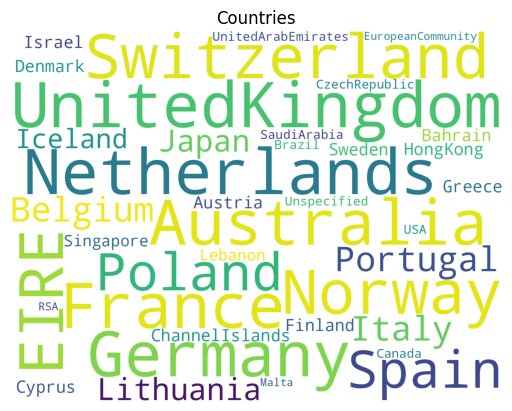

In [ ]:
text=[]
for i in countries:
    i=i.replace(' ','')
    text.append(i)
text=','.join(text)
wordcloud=WordCloud(width=1600,height=1200 , background_color='white').generate(text)
plt.title('Countries')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

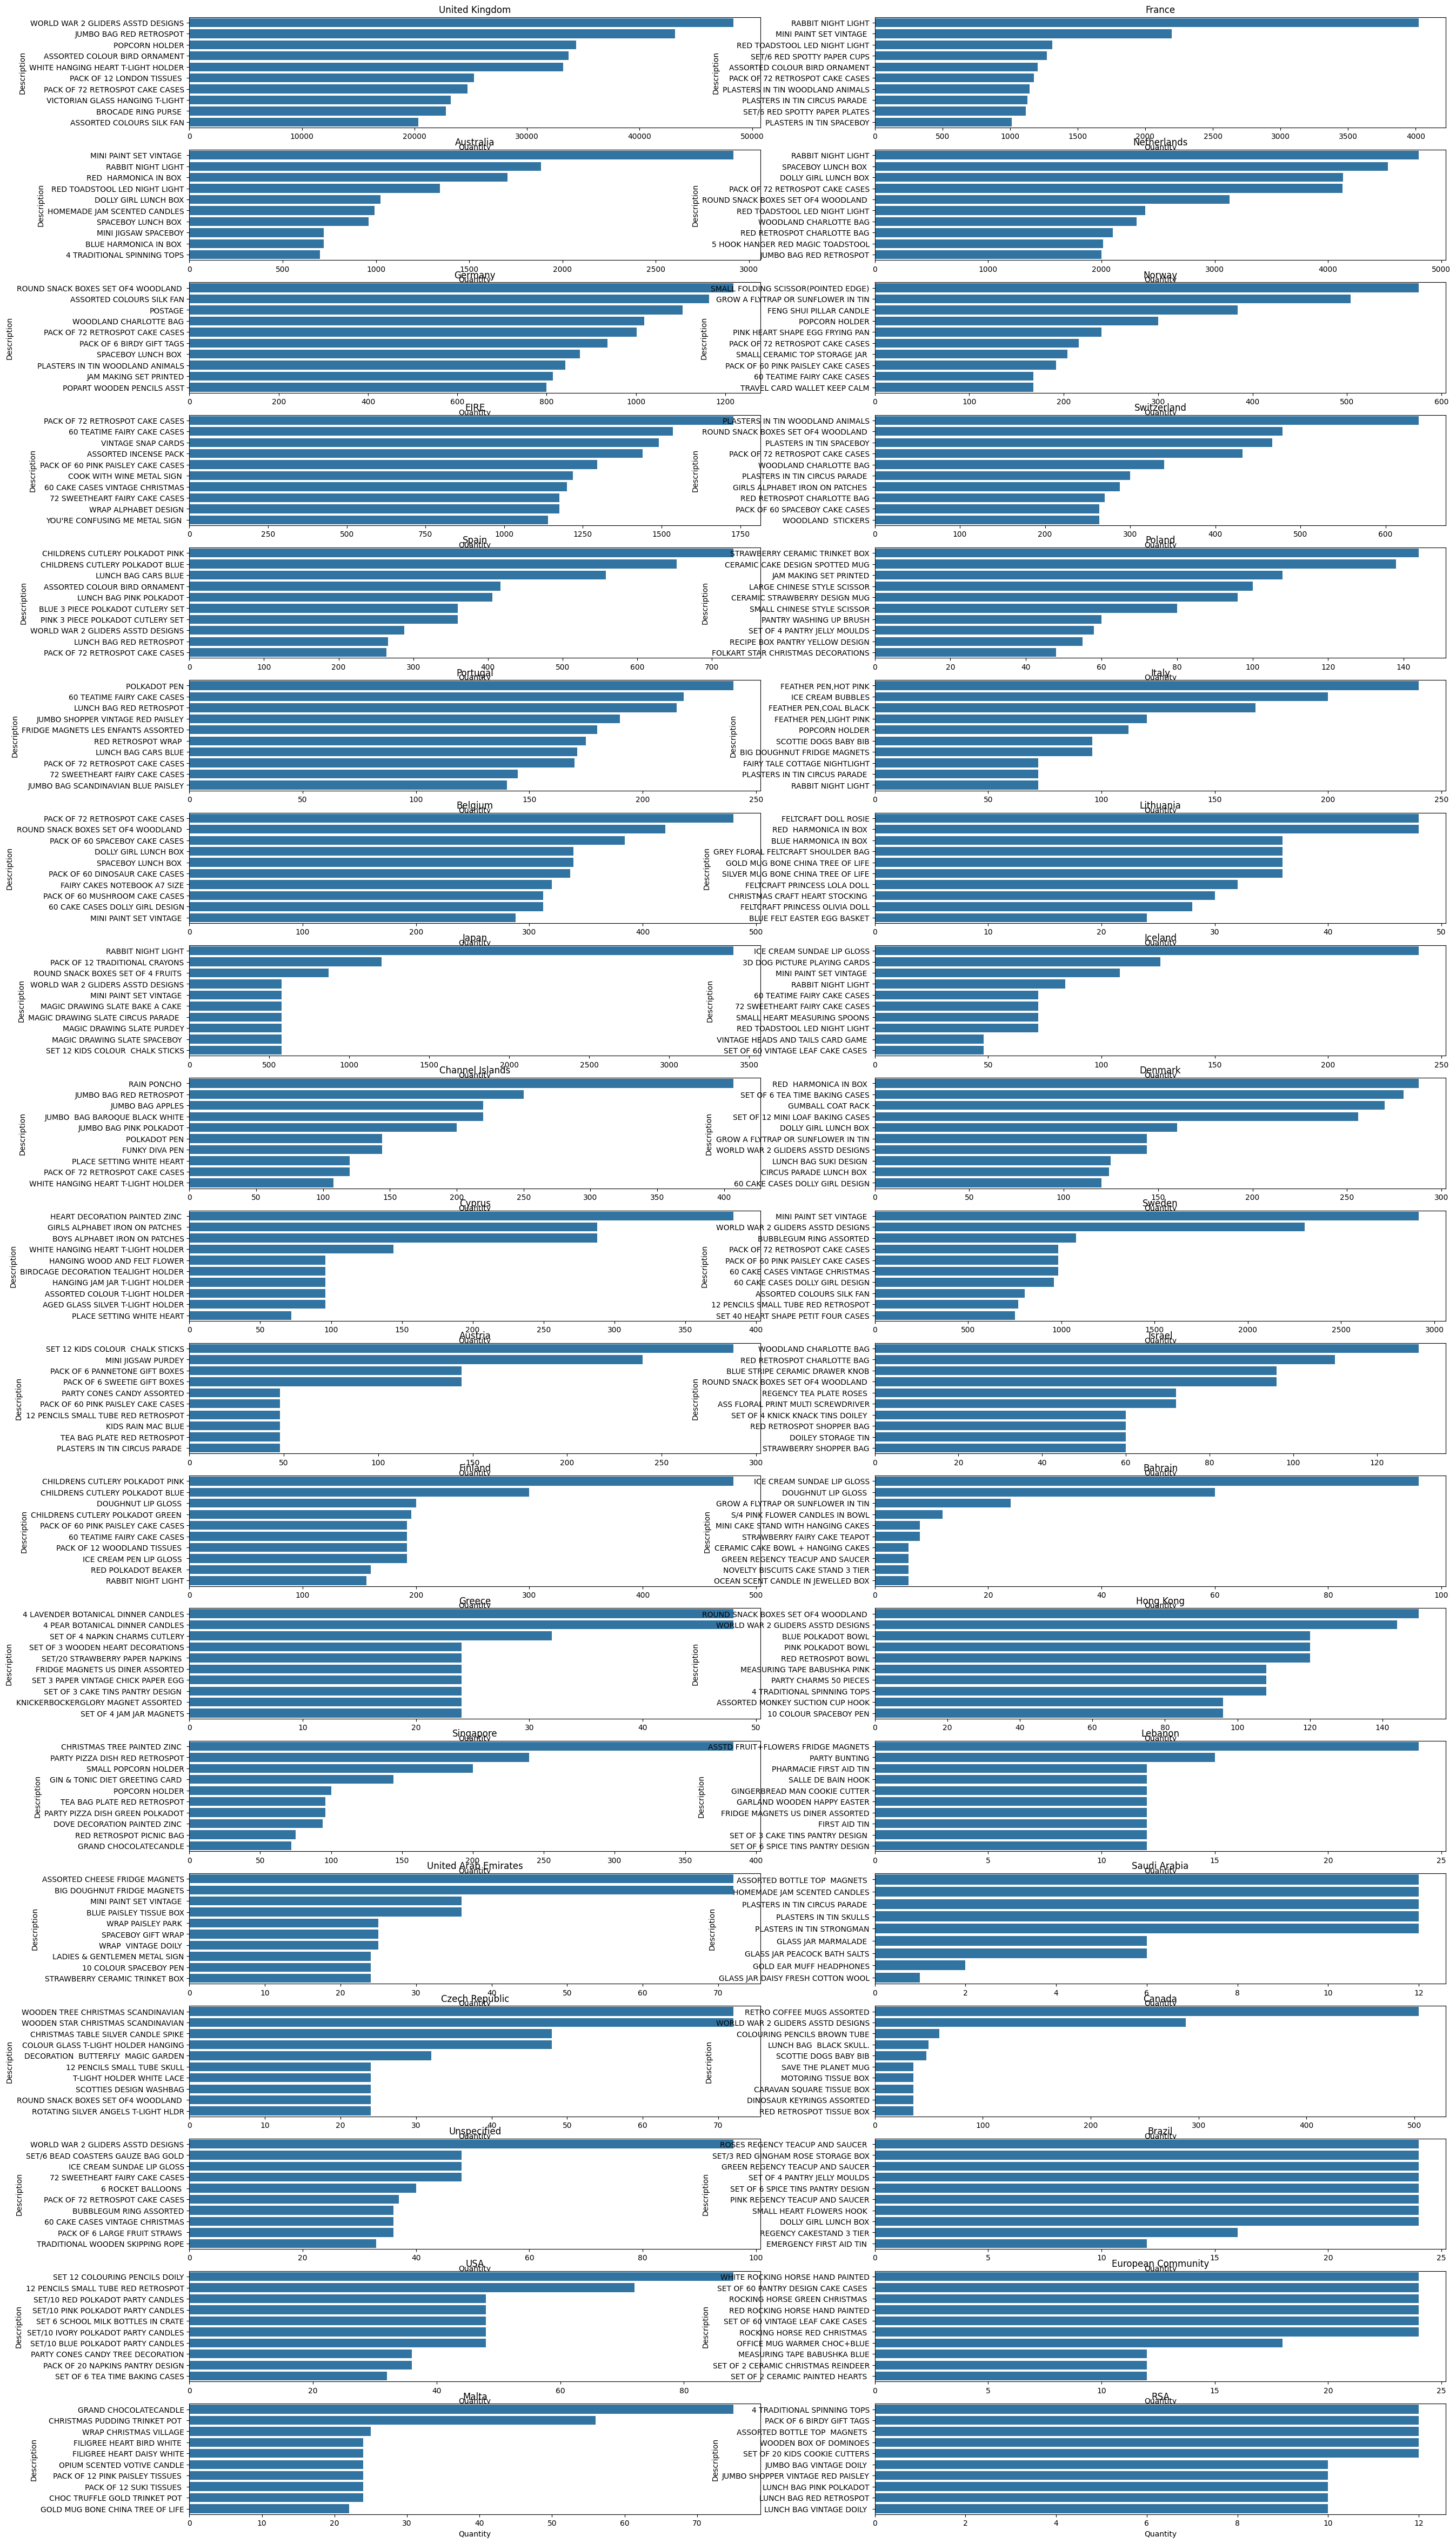

In [ ]:
fig, axes=plt.subplots(nrows=19,ncols=2 ,figsize=(30,60))
Top_Products_Countrywise=pd.DataFrame(columns=['country','Top_Product'])
for i,country in enumerate(countries):
    row=i//2
    col=i%2
    temp_df=top_products_countrywise[top_products_countrywise['Country']==country].sort_values(by='Quantity',ascending=False).head(10)
    Top_Products_Countrywise=pd.concat([Top_Products_Countrywise, pd.DataFrame({'country': [country], 'Top_Product': [temp_df.head(1)['Description'].values[0]]})], ignore_index=True)
    sns.barplot(temp_df,x='Quantity',y='Description',ax=axes[row,col])
    axes[row,col].set_title(country)
    

In [ ]:
Top_Products_Countrywise

,country,Top_Product
0,United Kingdom,WORLD WAR 2 GLIDERS ASSTD DESIGNS
1,France,RABBIT NIGHT LIGHT
2,Australia,MINI PAINT SET VINTAGE
3,Netherlands,RABBIT NIGHT LIGHT
4,Germany,ROUND SNACK BOXES SET OF4 WOODLAND
5,Norway,SMALL FOLDING SCISSOR(POINTED EDGE)
6,EIRE,PACK OF 72 RETROSPOT CAKE CASES
7,Switzerland,PLASTERS IN TIN WOODLAND ANIMALS
8,Spain,CHILDRENS CUTLERY POLKADOT PINK
9,Poland,STRAWBERRY CERAMIC TRINKET BOX


## Top Products Year Wise

In [ ]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['Invoice_year']=df['InvoiceDate'].dt.year
df['Invoice_month']=df['InvoiceDate'].dt.month
df['Invoice_hour']=df['InvoiceDate'].dt.hour

In [ ]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_hour
371566,569221,15056N,EDWARDIAN PARASOL NATURAL,2,2011-10-02 13:44:00,5.95,14970.0,United Kingdom,2011,10,13
162266,550499,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2011-04-18 15:16:00,2.95,NaN,United Kingdom,2011,4,15
384660,570168,21094,SET/6 RED SPOTTY PAPER PLATES,10,2011-10-07 14:05:00,0.85,17596.0,United Kingdom,2011,10,14
199764,554102,22936,BAKING MOULD ROSE WHITE CHOCOLATE,3,2011-05-22 13:40:00,3.25,14647.0,United Kingdom,2011,5,13
51055,540639,22437,SET OF 9 BLACK SKULL BALLOONS,20,2011-01-10 12:28:00,0.85,13107.0,United Kingdom,2011,1,12


In [ ]:
df['Invoice_year'].unique()

array([2010, 2011])

In [ ]:
year_2010_df=df[df['Invoice_year']==2010]
year_2010_df=year_2010_df.groupby(by='Description').agg({'Quantity':'sum'}).reset_index().sort_values(by='Quantity',ascending=False)
year_2010_df

,Description,Quantity
2710,WORLD WAR 2 GLIDERS ASSTD DESIGNS,5195
1677,PACK OF 72 RETROSPOT CAKE CASES,4076
1166,HAND WARMER BABUSHKA DESIGN,3382
2649,WHITE HANGING HEART T-LIGHT HOLDER,3343
2386,SMALL POPCORN HOLDER,2731
...,...,...
2758,damages,-43
2757,check,-55
485,CARD HOLDER GINGHAM HEART,-99
810,Dotcom sales,-200


In [ ]:
year_2011_df=df[df['Invoice_year']==2011]
year_2011_df=year_2011_df.groupby(by='Description').agg({'Quantity':'sum'}).reset_index().sort_values(by='Quantity',ascending=False)
year_2011_df

,Description,Quantity
3906,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48652
1807,JUMBO BAG RED RETROSPOT,45237
2662,POPCORN HOLDER,36334
239,ASSORTED COLOUR BIRD ORNAMENT,34010
3816,WHITE HANGING HEART T-LIGHT HOLDER,31974
...,...,...
1087,Damaged,-7540
2715,Printing smudges/thrown away,-9058
4009,check,-11975
3646,"Unsaleable, destroyed.",-15644


Text(0.5, 1.0, 'YEAR 2011')

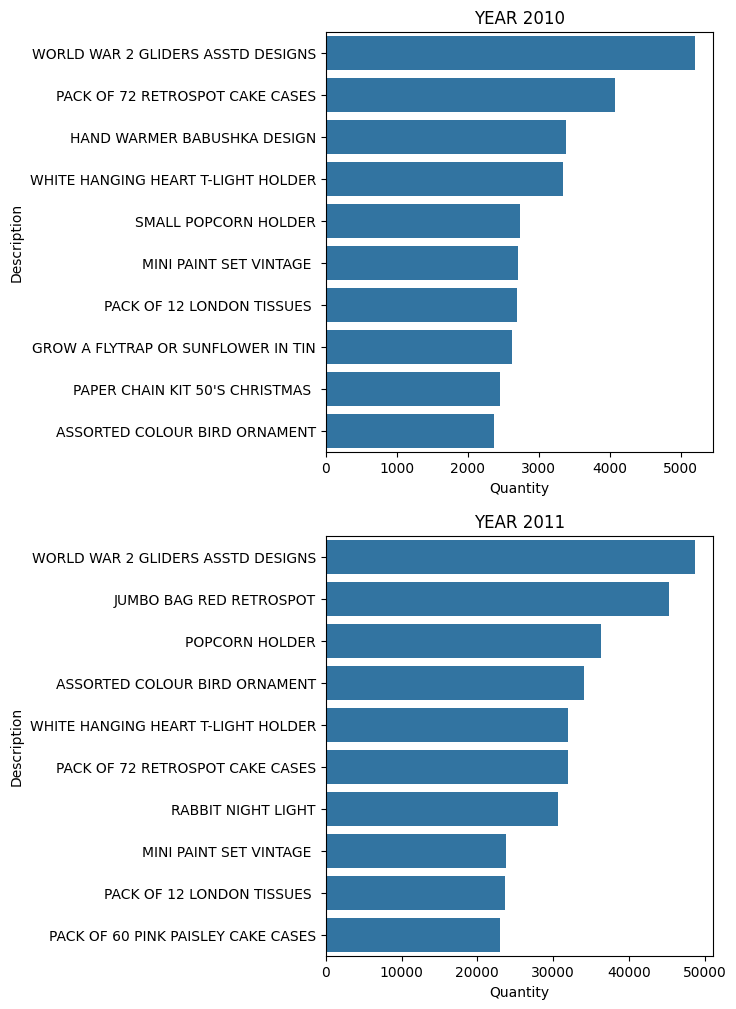

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(5,12))
sns.barplot(year_2010_df.head(10),x='Quantity',y='Description',ax=axes[0])
axes[0].set_title('YEAR 2010')
sns.barplot(year_2011_df.head(10),x='Quantity',y='Description',ax=axes[1])
axes[1].set_title('YEAR 2011')


## Top Products Month Wise

In [ ]:
top_products_monthwise=df.groupby(by=['Invoice_month','Description']).agg({'Quantity':'sum'}).reset_index()
top_products_monthwise

,Invoice_month,Description,Quantity
0,1,4 PURPLE FLOCK DINNER CANDLES,2
1,1,OVAL WALL MIRROR DIAMANTE,23
2,1,SET 2 TEA TOWELS I LOVE LONDON,430
3,1,10 COLOUR SPACEBOY PEN,236
4,1,12 COLOURED PARTY BALLOONS,80
...,...,...,...
32449,12,missing,-338
32450,12,mixed up,-424
32451,12,smashed,-235
32452,12,wet,-48


In [ ]:
top_products_monthwise[top_products_monthwise['Invoice_month']==1].sort_values(by='Quantity',ascending=False).head(10)

,Invoice_month,Description,Quantity
2450,1,WHITE HANGING HEART T-LIGHT HOLDER,5530
1532,1,PACK OF 72 RETROSPOT CAKE CASES,3409
789,1,FAIRY CAKE FLANNEL ASSORTED COLOUR,3246
372,1,BROCADE RING PURSE,3181
1100,1,HEART OF WICKER SMALL,2919
1186,1,JUMBO BAG RED RETROSPOT,2639
946,1,GIN + TONIC DIET METAL SIGN,2410
509,1,CHINESE DRAGON PAPER LANTERNS,2128
1380,1,MINI PAINT SET VINTAGE,1913
2195,1,SMALL POPCORN HOLDER,1809


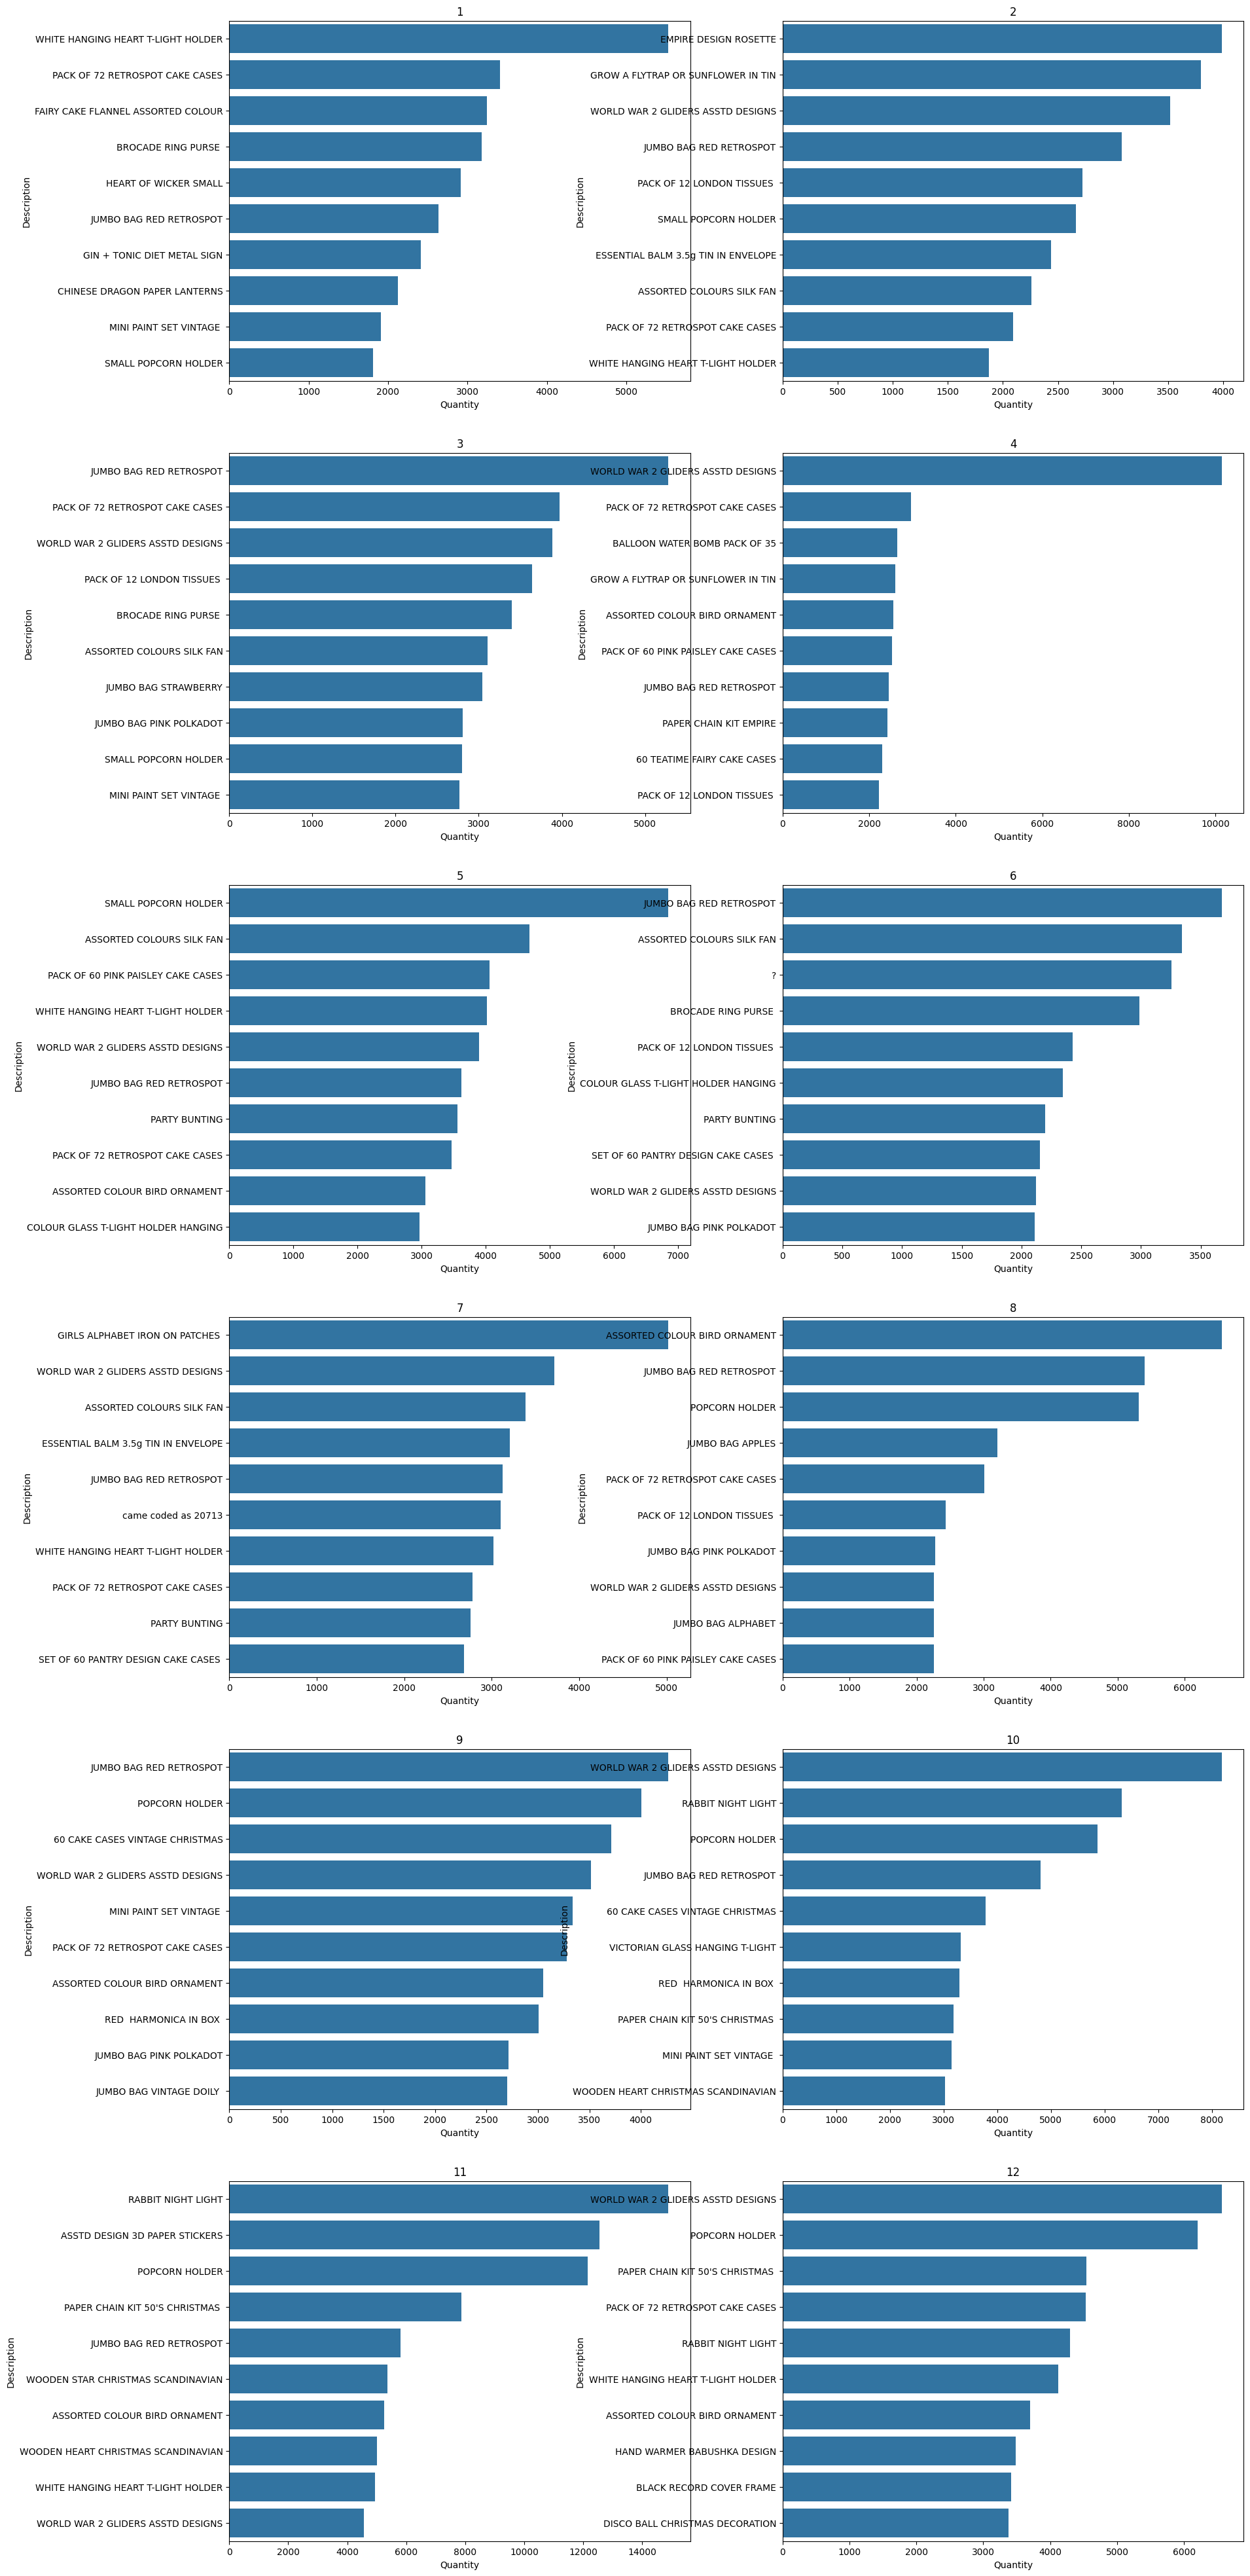

In [ ]:
fig,axes=plt.subplots(nrows=6,ncols=2,figsize=(20,50))
for i in range(0,12):
    row=i//2
    col=i%2
    temp_df=top_products_monthwise[top_products_monthwise['Invoice_month']==i+1].sort_values(by='Quantity',ascending=False).head(10)
    sns.barplot(temp_df,x='Quantity',y='Description',ax=axes[row,col])
    axes[row,col].set_title(i+1)

## Month Wise Sale Analysis

In [ ]:
df.groupby(by=['Invoice_month']).agg({'Quantity':'sum'}).reset_index()

,Invoice_month,Quantity
0,1,308966
1,2,277989
2,3,351872
3,4,289098
4,5,380391
5,6,341623
6,7,391116
7,8,406199
8,9,549817
9,10,570532


In [ ]:
fig=px.line(df.groupby(by=['Invoice_month']).agg({'Quantity':'sum'}).reset_index(),x='Invoice_month',y='Quantity',title='Monthwise sales')
fig.show()

#### Most of the sales were in the month of november 

## Hour Wise Sales 

In [ ]:
df.groupby(by='Invoice_hour').agg({'Quantity':'sum'}).reset_index()
fig=px.bar(df.groupby(by='Invoice_hour').agg({'Quantity':'sum'}).reset_index(),x='Invoice_hour',y='Quantity',title='Hour wise sale')
fig.show()

#### The graph shows that the busiest time is between 10 and 15 (3 PM).

## Most Frequent Customers Analysis

In [ ]:
Most_freq_cust=pd.DataFrame(df['CustomerID'].value_counts().head(10)).reset_index()
Most_freq_cust

,CustomerID,count
0,17841.0,7983
1,14911.0,5903
2,14096.0,5128
3,12748.0,4642
4,14606.0,2782
5,15311.0,2491
6,14646.0,2085
7,13089.0,1857
8,13263.0,1677
9,14298.0,1640


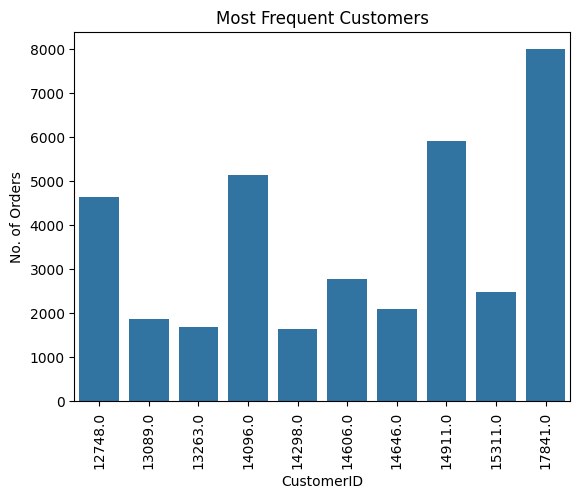

In [ ]:
sns.barplot(Most_freq_cust,x='CustomerID',y='count')
plt.tick_params(axis='x',rotation=90)
plt.title('Most Frequent Customers')
plt.ylabel('No. of Orders')
plt.show()

In [ ]:
df['Total_amount_paid']=df['Quantity']*df['UnitPrice']


In [ ]:
top_customers=df[df['CustomerID'].isin(Most_freq_cust['CustomerID'])][['CustomerID','Country','Description','Quantity','Total_amount_paid']]
top_customers

,CustomerID,Country,Description,Quantity,Total_amount_paid
106,15311.0,United Kingdom,RETROSPOT TEA SET CERAMIC 11 PC,23,97.75
107,15311.0,United Kingdom,GIRLY PINK TOOL SET,5,24.75
108,15311.0,United Kingdom,JUMBO SHOPPER VINTAGE RED PAISLEY,10,19.50
109,15311.0,United Kingdom,"AIRLINE LOUNGE,METAL SIGN",2,4.20
110,15311.0,United Kingdom,WHITE SPOT RED CERAMIC DRAWER KNOB,6,7.50
...,...,...,...,...,...
541855,12748.0,United Kingdom,CINAMMON & ORANGE WREATH,1,6.75
541856,12748.0,United Kingdom,PINK REGENCY TEACUP AND SAUCER,1,2.95
541857,12748.0,United Kingdom,20 DOLLY PEGS RETROSPOT,1,1.45
541858,12748.0,United Kingdom,CHILLI LIGHTS,2,11.50


In [ ]:
top_customers[['CustomerID','Country']].drop_duplicates()

,CustomerID,Country
106,15311.0,United Kingdom
1016,12748.0,United Kingdom
1404,14911.0,EIRE
1441,17841.0,United Kingdom
2421,14606.0,United Kingdom
7440,13089.0,United Kingdom
29815,14298.0,United Kingdom
37952,14646.0,Netherlands
62628,13263.0,United Kingdom
317502,14096.0,United Kingdom


#### Most of the Frequent Customers are from United Kingdom

In [ ]:
customer_Total_payments=df.groupby(by='CustomerID').agg({'Total_amount_paid':'sum'}).reset_index().sort_values(by='Total_amount_paid',ascending=False)
customer_Total_payments

,CustomerID,Total_amount_paid
1703,14646.0,279489.02
4233,18102.0,256438.49
3758,17450.0,187482.17
1895,14911.0,132572.62
55,12415.0,123725.45
...,...,...
125,12503.0,-1126.00
3870,17603.0,-1165.30
1384,14213.0,-1192.20
2236,15369.0,-1592.49


These are the total amount paid by each customers. 

In [ ]:
Top_customer_total_payment=pd.merge(df[df['CustomerID'].isin(customer_Total_payments.head(10)['CustomerID'])][['CustomerID','Country']].drop_duplicates()
,customer_Total_payments.head(10),how='inner').sort_values(by='Total_amount_paid',ascending=False)
Top_customer_total_payment

,CustomerID,Country,Total_amount_paid
8,14646.0,Netherlands,279489.02
6,18102.0,United Kingdom,256438.49
5,17450.0,United Kingdom,187482.17
3,14911.0,EIRE,132572.62
9,12415.0,Australia,123725.45
4,14156.0,EIRE,113384.14
1,17511.0,United Kingdom,88125.38
7,16684.0,United Kingdom,65892.08
2,13694.0,United Kingdom,62653.10
0,15311.0,United Kingdom,59419.34


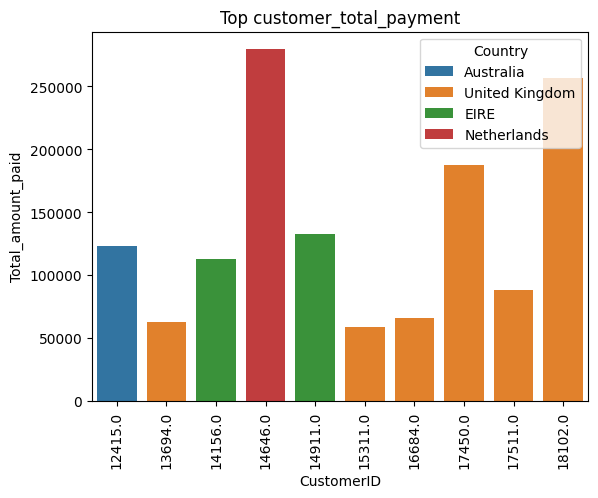

In [ ]:
sns.barplot(Top_customer_total_payment,x='CustomerID',y='Total_amount_paid',hue='Country',dodge=False)
plt.tick_params(axis='x',rotation=90)
plt.title('Top customer_total_payment')
plt.show()

## Number of Customers From each Country

In [ ]:
pd.DataFrame(df['Country'].value_counts()).reset_index()

,Country,count
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,2002
8,Portugal,1519
9,Australia,1259


In [ ]:
fig=px.bar(pd.DataFrame(df['Country'].value_counts()).reset_index(),y='Country',x='count')
fig.show()

In our Dataset Most of the Customers are from United kingdom 

## Total amound Paid Per Country

In [ ]:
Total_amount_paid_per_country=df.groupby('Country').agg({'Total_amount_paid':'sum'}).reset_index()
Total_amount_paid_per_country

,Country,Total_amount_paid
0,Australia,137077.270
1,Austria,10154.320
2,Bahrain,548.400
3,Belgium,40910.960
4,Brazil,1143.600
5,Canada,3666.380
6,Channel Islands,20086.290
7,Cyprus,12946.290
8,Czech Republic,707.720
9,Denmark,18768.140


In [ ]:
fig=px.bar(Total_amount_paid_per_country,x='Country',y='Total_amount_paid',title='Total amount paid per country ')
fig.show()

# Data Cleaning

In [ ]:
df_clean = df.dropna(subset=['CustomerID'])
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean = df_clean[~df_clean['InvoiceNo'].str.contains('C')]

print(f"Data siap: {len(df_clean)} baris transaksi valid.")

C:\Users\Matthew\AppData\Local\Temp\ipykernel_10564\3678732814.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Data siap: 397924 baris transaksi valid.


In [ ]:
print(df.isnull().sum())

df_clean = (
    df.dropna(subset=['CustomerID', 'Description'])
        .loc[lambda d: ~d['InvoiceNo'].str.contains('C')]
        .loc[lambda d: d['Quantity'] > 0]
        .copy()
)
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

print(f"Data siap: {len(df_clean)} baris transaksi valid.")

InvoiceNo                 0
StockCode                 0
Description            1454
Quantity                  0
InvoiceDate               0
UnitPrice                 0
CustomerID           135080
Country                   0
Invoice_year              0
Invoice_month             0
Invoice_hour              0
Total_amount_paid         0
dtype: int64
Data siap: 397924 baris transaksi valid.


# Frequent Pattern


VISUALISASI UNTUK MINIMUM SUPPORT = 0.05 (5.0%)


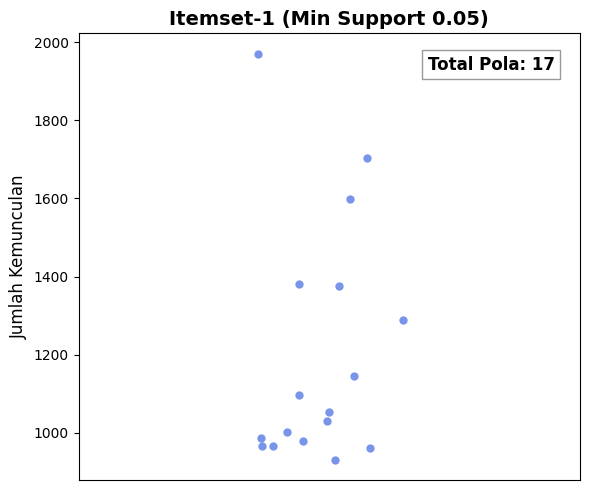

C:\Users\Matthew\AppData\Local\Temp\ipykernel_10564\1118601838.py:91: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




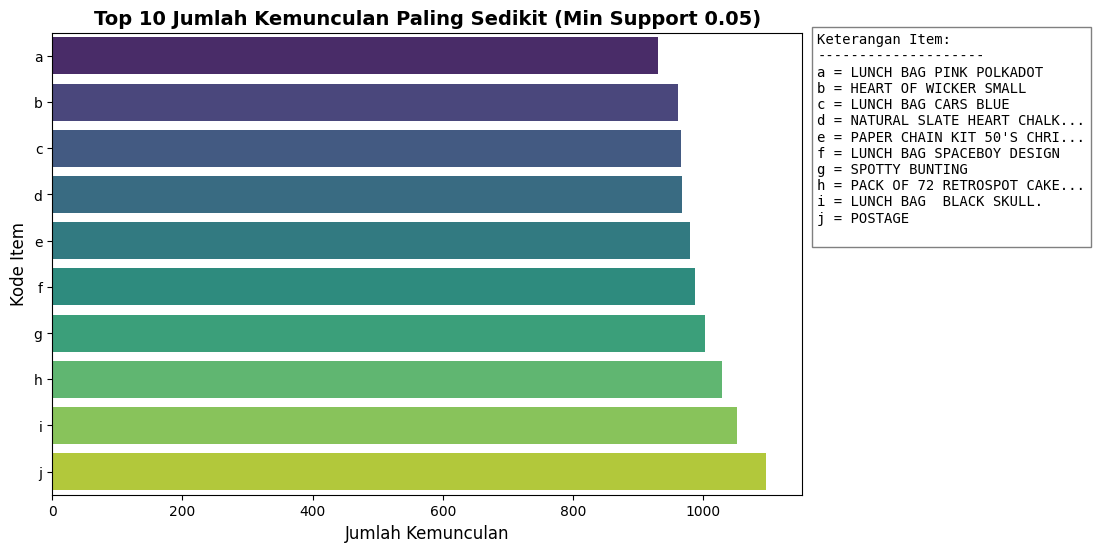


VISUALISASI UNTUK MINIMUM SUPPORT = 0.01 (1.0%)


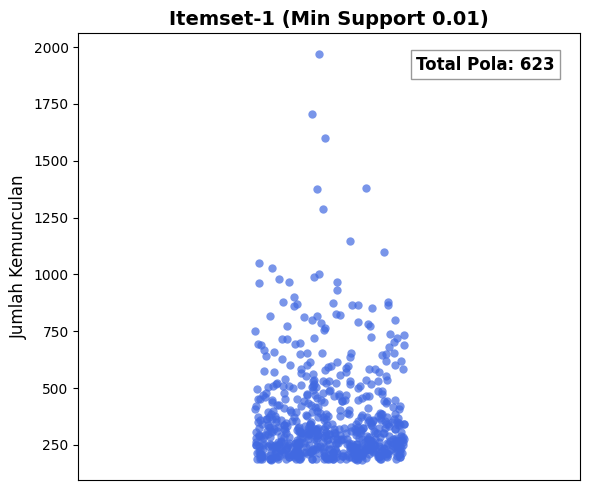

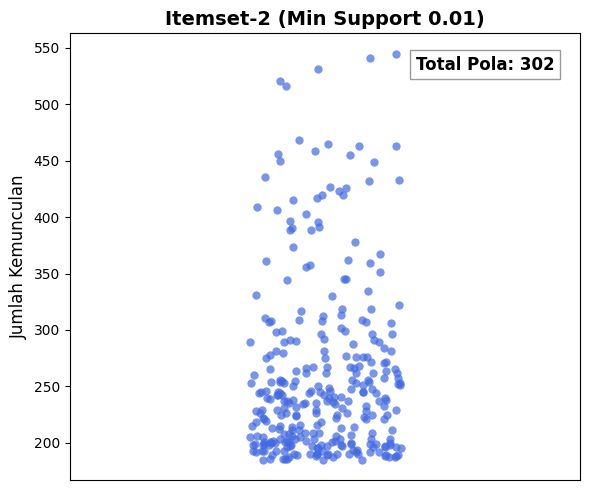

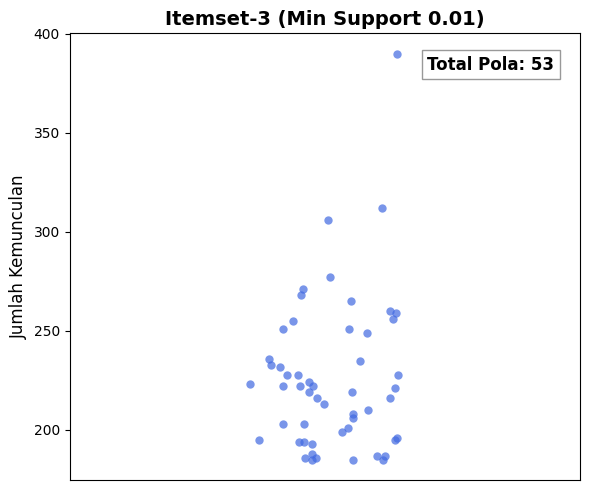

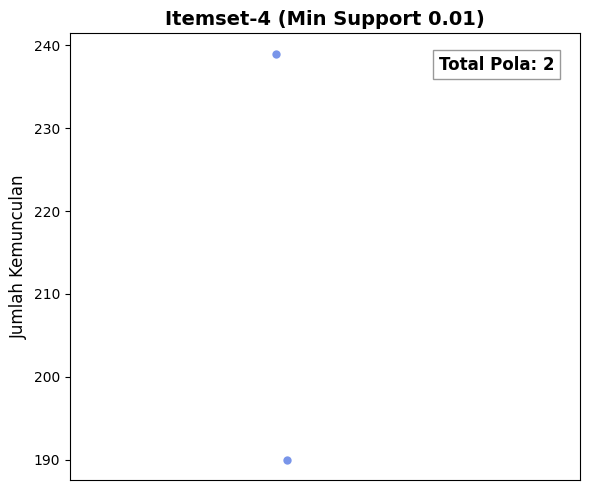

C:\Users\Matthew\AppData\Local\Temp\ipykernel_10564\1118601838.py:91: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




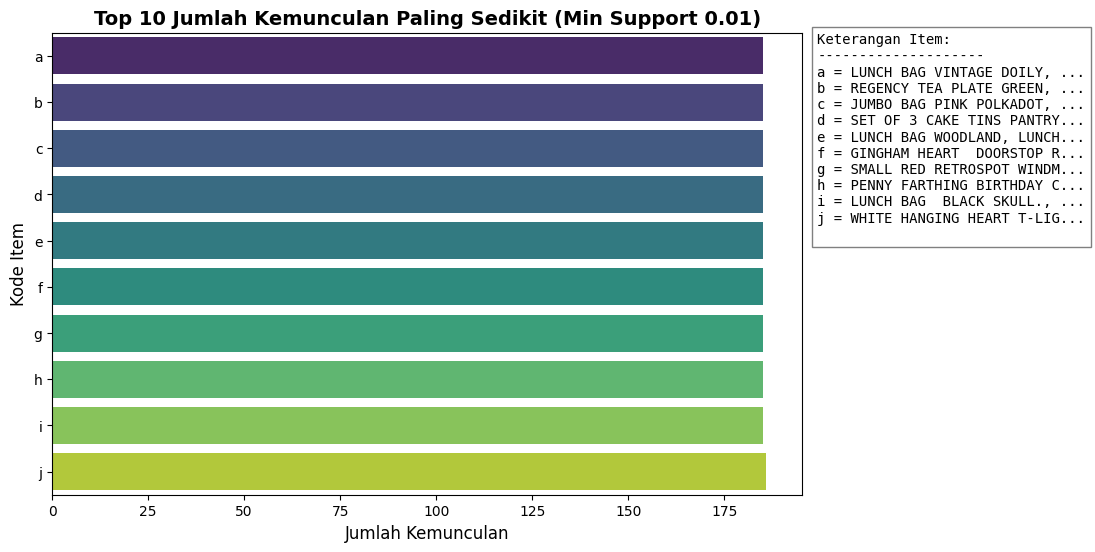

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# --- 1. Persiapan Data ---
# Pastikan path file benar
df = pd.read_csv('online_retail.csv', encoding='ISO-8859-1')

# Data Cleaning
df_clean = df.dropna(subset=['Description', 'CustomerID'])
df_clean = df_clean[~df_clean['InvoiceNo'].str.startswith('C')]
df_clean['Description'] = df_clean['Description'].str.strip()

basket = df_clean.groupby(['CustomerID', 'InvoiceDate'])['Description'].apply(list).reset_index()

te = TransactionEncoder()
te_ary = te.fit(basket['Description']).transform(basket['Description'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
total_transactions = len(df_encoded)

# --- 2. Fungsi Utama Plotting (Revisi Judul) ---
def analyze_and_plot_final_v4(df_encoded, min_support_val):
    print(f"\n{'='*60}")
    print(f"VISUALISASI UNTUK MINIMUM SUPPORT = {min_support_val} ({min_support_val*100}%)")
    print(f"{'='*60}")
    
    # Jalankan Apriori
    frequent_items = apriori(df_encoded, min_support=min_support_val, use_colnames=True)
    
    if frequent_items.empty:
        print("Tidak ada frequent pattern ditemukan.")
        return

    # Data preprocessing
    frequent_items['length'] = frequent_items['itemsets'].apply(lambda x: len(x))
    frequent_items['count'] = (frequent_items['support'] * total_transactions).astype(int)
    frequent_items['itemsets_str'] = frequent_items['itemsets'].apply(lambda x: ', '.join(list(x)))
    
    unique_lengths = sorted(frequent_items['length'].unique())

    # --- BAGIAN 1: SCATTER PLOT (Total Pola -> DALAM PLOT) ---
    for length in unique_lengths:
        subset = frequent_items[frequent_items['length'] == length]
        total_pola = len(subset)
        
        plt.figure(figsize=(6, 5))
        
        # Plot titik
        sns.stripplot(y=subset['count'], jitter=0.15, size=6, color='royalblue', alpha=0.7)
        
        # --- PERUBAHAN JUDUL DI SINI ---
        # Menambahkan info Min Support ke dalam judul
        judul = f'Itemset-{length} (Min Support {min_support_val})'
        plt.title(judul, fontsize=14, weight='bold', loc='center')
        
        plt.ylabel('Jumlah Kemunculan', fontsize=12)
        plt.xticks([]) 
        
        # POSISI: Di DALAM Plot (Pojok Kanan Atas)
        plt.text(0.95, 0.95, f'Total Pola: {total_pola}', 
                 transform=plt.gca().transAxes, 
                 horizontalalignment='right', 
                 verticalalignment='top', 
                 fontsize=12, fontweight='bold',
                 bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8))
        
        plt.tight_layout()
        plt.show()

    # --- BAGIAN 2: BAR CHART (Legend Item -> LUAR PLOT) ---
    bottom_10 = frequent_items.sort_values('count', ascending=True).head(10).copy()
    
    aliases = list(string.ascii_lowercase)[:len(bottom_10)]
    bottom_10['alias'] = aliases
    
    # Membuat Teks Legend
    legend_text = "Keterangan Item:\n" + "-"*20 + "\n"
    for _, row in bottom_10.iterrows():
        item_name = row['itemsets_str'][:25] + '...' if len(row['itemsets_str']) > 25 else row['itemsets_str']
        legend_text += f"{row['alias']} = {item_name}\n"
    
    # Ukuran figure diperlebar agar muat legend di samping
    plt.figure(figsize=(12, 6))
    
    # Kita bagi layout: subplot agar lebih rapi
    ax = plt.subplot(111)
    
    sns.barplot(data=bottom_10, y='alias', x='count', palette='viridis', ax=ax)
    
    ax.set_title(f'Top 10 Jumlah Kemunculan Paling Sedikit (Min Support {min_support_val})', fontsize=14, weight='bold')
    ax.set_xlabel('Jumlah Kemunculan', fontsize=12)
    ax.set_ylabel('Kode Item', fontsize=12)
    
    # POSISI: Legend Di LUAR Plot (Sebelah Kanan)
    plt.text(1.02, 1.0, legend_text, 
             transform=ax.transAxes, 
             horizontalalignment='left', 
             verticalalignment='top', 
             fontsize=10, family='monospace',
             bbox=dict(facecolor='white', edgecolor='gray', alpha=1.0))
    
    # Menyesuaikan margin kanan
    plt.subplots_adjust(right=0.75)
    
    plt.show()

# --- 3. Eksekusi Kode ---
# Skenario 1: Support 0.05 (5%)
analyze_and_plot_final_v4(df_encoded, min_support_val=0.05)

# Skenario 2: Support 0.01 (1%)
analyze_and_plot_final_v4(df_encoded, min_support_val=0.01)

Sedang memuat data...
Total Transaksi: 18444

ANALISIS FP-GROWTH (Min Support: 0.05)
  -> Gambar Tree disimpan: FPGrowth_Tree_Sup0.05.png


C:\Users\Matthew\AppData\Local\Temp\ipykernel_10564\798304097.py:156: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




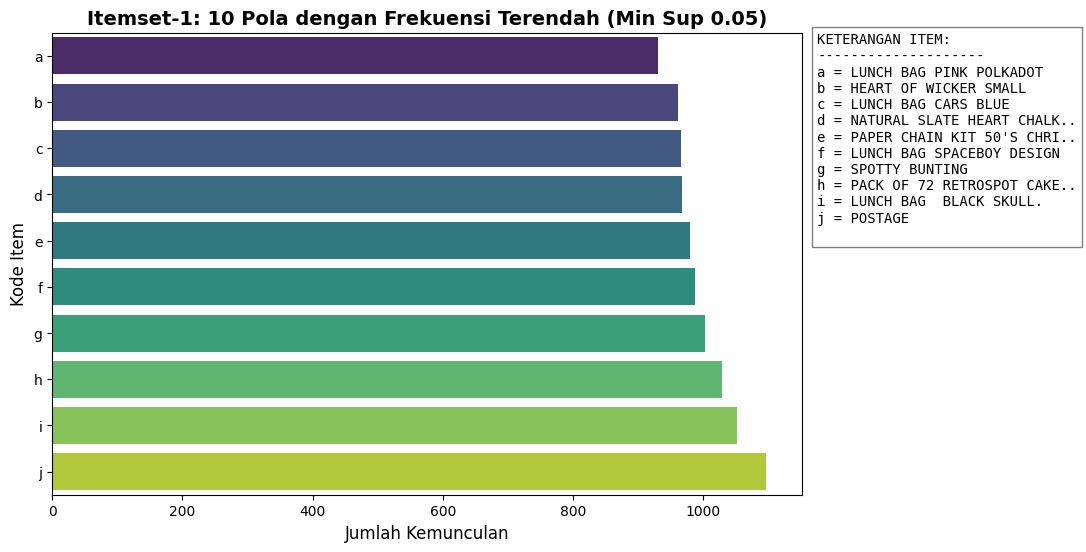


ANALISIS FP-GROWTH (Min Support: 0.01)
  -> Gambar Tree disimpan: FPGrowth_Tree_Sup0.01.png


C:\Users\Matthew\AppData\Local\Temp\ipykernel_10564\798304097.py:156: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




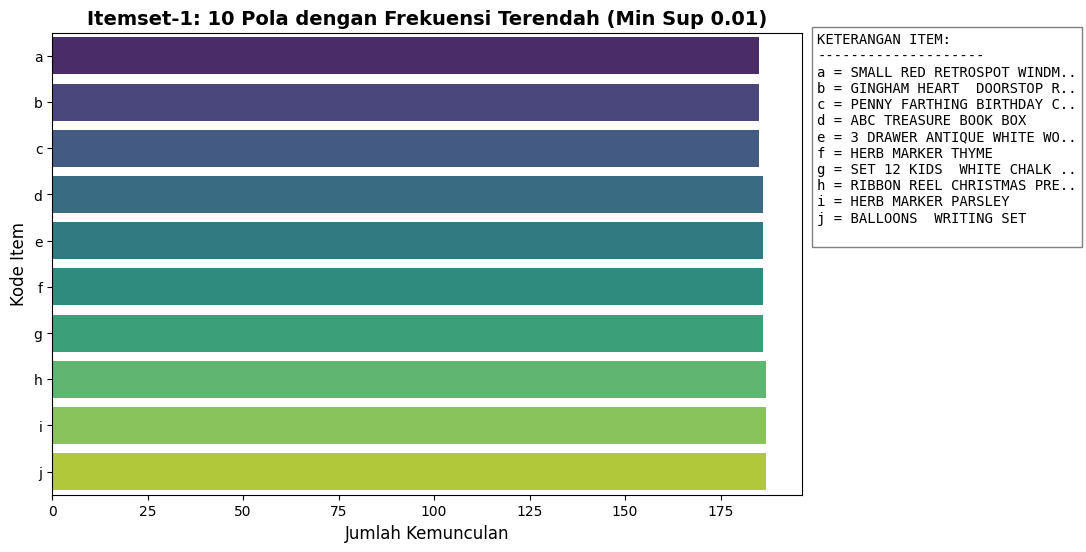

C:\Users\Matthew\AppData\Local\Temp\ipykernel_10564\798304097.py:156: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




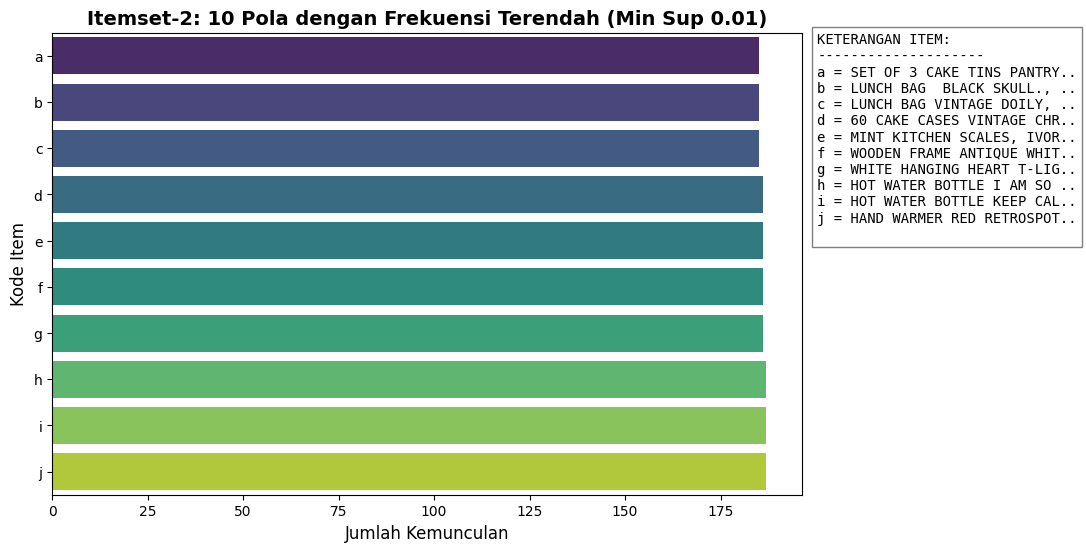

C:\Users\Matthew\AppData\Local\Temp\ipykernel_10564\798304097.py:156: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




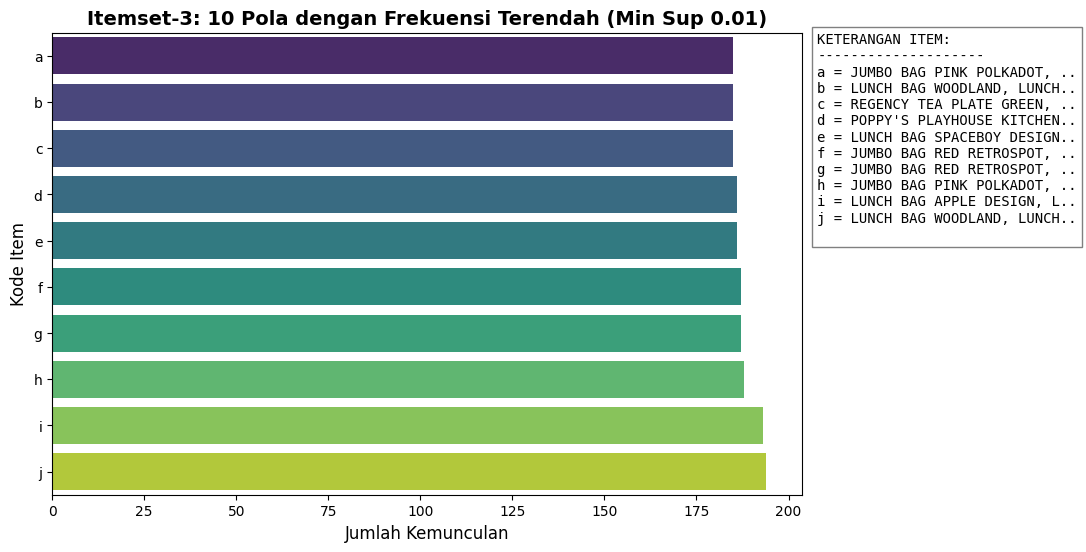

C:\Users\Matthew\AppData\Local\Temp\ipykernel_10564\798304097.py:156: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




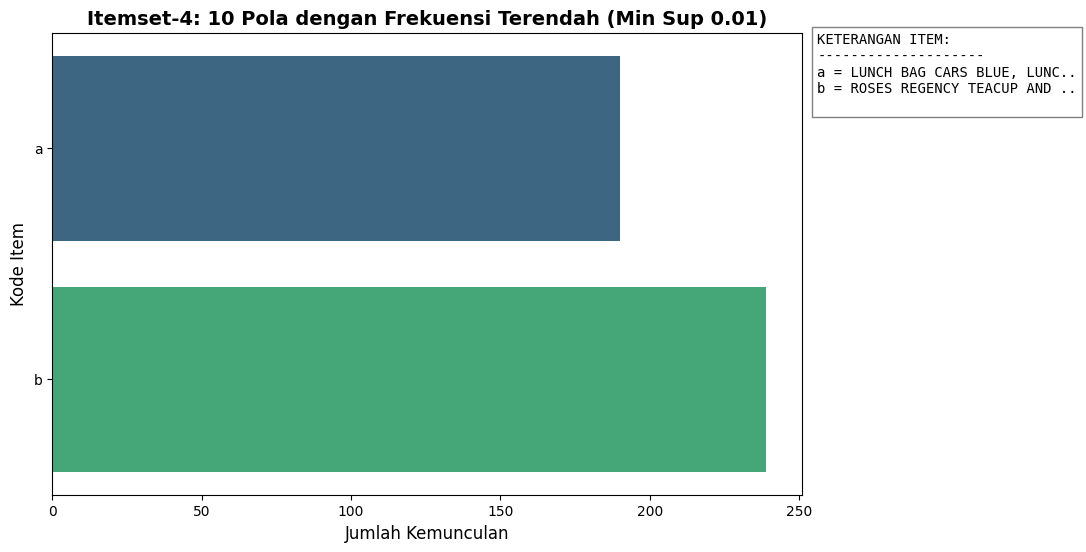

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import string
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

# --- 1. Persiapan Data ---
print("Sedang memuat data...")
# Pastikan path file benar
df = pd.read_csv('online_retail.csv', encoding='ISO-8859-1')

# Cleaning Data
df_clean = df.dropna(subset=['Description', 'CustomerID'])
df_clean = df_clean[~df_clean['InvoiceNo'].str.startswith('C')]
df_clean['Description'] = df_clean['Description'].str.strip()

# Membuat Basket Transaksi
basket = df_clean.groupby(['CustomerID', 'InvoiceDate'])['Description'].apply(list).reset_index()

# Encoding Data (Diperlukan untuk FP-Growth Library)
te = TransactionEncoder()
te_ary = te.fit(basket['Description']).transform(basket['Description'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
total_transactions = len(df_encoded)

print(f"Total Transaksi: {total_transactions}")

# --- 2. Fungsi Visualisasi ---

def plot_tree_viz(frequent_itemsets, min_support_val):
    """
    Membuat Visualisasi Tree untuk pola dengan Support TERTINGGI (Dominan).
    Alias (a, b, c) diberikan urut dari support tertinggi.
    """
    # Ambil Top 20 Pola Terbesar untuk Tree
    top_patterns = frequent_itemsets.sort_values('support', ascending=False).head(20).copy()
    
    # --- LOGIKA ALIAS (Lokal untuk Tree) ---
    # Item paling sering muncul = 'a'
    unique_items = set()
    for itemset in top_patterns['itemsets']:
        unique_items.update(itemset)
    
    # Urutkan item berdasarkan global support agar 'a' adalah item terpopuler
    item_supports = {}
    for item in unique_items:
        # Cari support item tunggal
        match = frequent_itemsets[frequent_itemsets['itemsets'] == frozenset([item])]
        item_supports[item] = match.iloc[0]['support'] if not match.empty else 0
        
    sorted_items = sorted(list(unique_items), key=lambda x: item_supports[x], reverse=True)
    
    # Buat Mapping Alias (a, b, c...)
    alias_map = {}
    letters = list(string.ascii_lowercase)
    legend_text = "KETERANGAN NODE (TREE):\n" + "-"*25 + "\n"
    
    for i, item in enumerate(sorted_items):
        alias = letters[i] if i < 26 else f"z{i}"
        alias_map[item] = alias
        # Tambahkan ke teks legenda
        name = item[:25] + "..." if len(item) > 25 else item
        legend_text += f"{alias} = {name}\n"

    # Bangun Graph
    G = nx.DiGraph()
    root = "ROOT"
    G.add_node(root, label="Null")
    
    for _, row in top_patterns.iterrows():
        items = list(row['itemsets'])
        # Sort item dalam node berdasarkan alias (a -> b)
        items.sort(key=lambda x: alias_map.get(x, 'z'))
        
        current_node = root
        for i, item in enumerate(items):
            item_name = items[i]
            alias = alias_map.get(item_name, '?')
            
            # ID Node unik
            node_id = "_".join([alias_map.get(x, '?') for x in items[:i+1]])
            
            count = int(row['support'] * total_transactions)
            label = f"{alias}\n({count})"
            
            if not G.has_node(node_id):
                G.add_node(node_id, label=label)
                G.add_edge(current_node, node_id)
            current_node = node_id
            
    # Plotting Tree
    plt.figure(figsize=(14, 8))
    
    # GridSpec untuk membagi area: Gambar Tree (kiri) vs Legend (kanan)
    gs = plt.GridSpec(1, 2, width_ratios=[4, 1])
    ax_tree = plt.subplot(gs[0])
    ax_legend = plt.subplot(gs[1])
    
    ax_legend.axis('off')
    
    # Gambar Network
    pos = nx.kamada_kawai_layout(G)
    labels = nx.get_node_attributes(G, 'label')
    
    nx.draw(G, pos, with_labels=True, labels=labels, ax=ax_tree,
            node_size=1800, node_color='#81ecec', 
            edge_color='gray', font_size=9, font_weight='bold', 
            arrows=True, arrowsize=15)
    
    ax_tree.set_title(f"FP-Growth Tree Structure (Top Dominant Patterns)\nMin Support: {min_support_val}", fontsize=14, weight='bold')
    
    # Tampilkan Legend di Kanan
    ax_legend.text(0, 1, legend_text, verticalalignment='top', family='monospace', fontsize=10)
    
    filename = f"FPGrowth_Tree_Sup{min_support_val}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"  -> Gambar Tree disimpan: {filename}")
    plt.close() # Tutup agar tidak muncul dobel di notebook

def plot_bar_chart_viz(frequent_itemsets, min_support_val):
    """
    Membuat Bar Chart untuk pola dengan Frekuensi TERKECIL (Bottom 10).
    Alias (a, b, c) diberikan urut dari support terkecil (sama seperti Apriori).
    """
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    frequent_itemsets['count'] = (frequent_itemsets['support'] * total_transactions).astype(int)
    
    unique_lengths = sorted(frequent_itemsets['length'].unique())
    
    for length in unique_lengths:
        # Ambil Top 10 Terkecil (Ascending)
        subset = frequent_itemsets[frequent_itemsets['length'] == length].sort_values('count', ascending=True).head(10).copy()
        
        if subset.empty: continue
        
        # --- LOGIKA ALIAS (Lokal untuk Bar Chart - Seperti Apriori) ---
        # Item paling sedikit = 'a'
        aliases = list(string.ascii_lowercase)[:len(subset)]
        subset['alias'] = aliases
        
        # Buat kolom string untuk itemsets asli
        subset['itemsets_str'] = subset['itemsets'].apply(lambda x: ', '.join(list(x)))
        
        # Buat Legend Text
        legend_text = "KETERANGAN ITEM:\n" + "-"*20 + "\n"
        for _, row in subset.iterrows():
            item_name = row['itemsets_str'][:25] + ".." if len(row['itemsets_str']) > 25 else row['itemsets_str']
            legend_text += f"{row['alias']} = {item_name}\n"
            
        # Plotting Bar Chart
        plt.figure(figsize=(12, 6))
        ax = plt.subplot(111)
        
        sns.barplot(data=subset, y='alias', x='count', palette='viridis', ax=ax)
        
        ax.set_title(f"Itemset-{length}: 10 Pola dengan Frekuensi Terendah (Min Sup {min_support_val})", fontsize=14, weight='bold')
        ax.set_xlabel("Jumlah Kemunculan", fontsize=12)
        ax.set_ylabel("Kode Item", fontsize=12)
        
        # Legend di Luar Kanan
        plt.text(1.02, 1.0, legend_text, 
                 transform=ax.transAxes, 
                 verticalalignment='top', 
                 family='monospace', fontsize=10,
                 bbox=dict(facecolor='white', edgecolor='gray'))
        
        plt.subplots_adjust(right=0.75) 
        plt.show()

# --- 3. Fungsi Utama ---

def run_fpgrowth_analysis(df_encoded, min_support_val):
    print(f"\n{'='*60}")
    print(f"ANALISIS FP-GROWTH (Min Support: {min_support_val})")
    print(f"{'='*60}")
    
    # 1. Jalankan Library FP-Growth
    frequent_items = fpgrowth(df_encoded, min_support=min_support_val, use_colnames=True)
    
    if frequent_items.empty:
        print("Tidak ada pola ditemukan.")
        return

    # 2. Plot Tree (Disimpan PNG)
    plot_tree_viz(frequent_items, min_support_val)
    
    # 3. Plot Bar Chart (Tampil di Layar)
    plot_bar_chart_viz(frequent_items, min_support_val)

# --- Eksekusi Kode ---
run_fpgrowth_analysis(df_encoded, min_support_val=0.05)
run_fpgrowth_analysis(df_encoded, min_support_val=0.01)

Sedang memuat data...
Total Transaksi: 18444

--- Analisis Support 0.05 ---
  Jumlah Rules ditemukan: 0
  Tidak ada rules yang memenuhi kriteria.

--- Analisis Support 0.01 ---
  Jumlah Rules ditemukan: 950
  -> [Tabel Disimpan] AssocRules_Table_Sup0.01.png


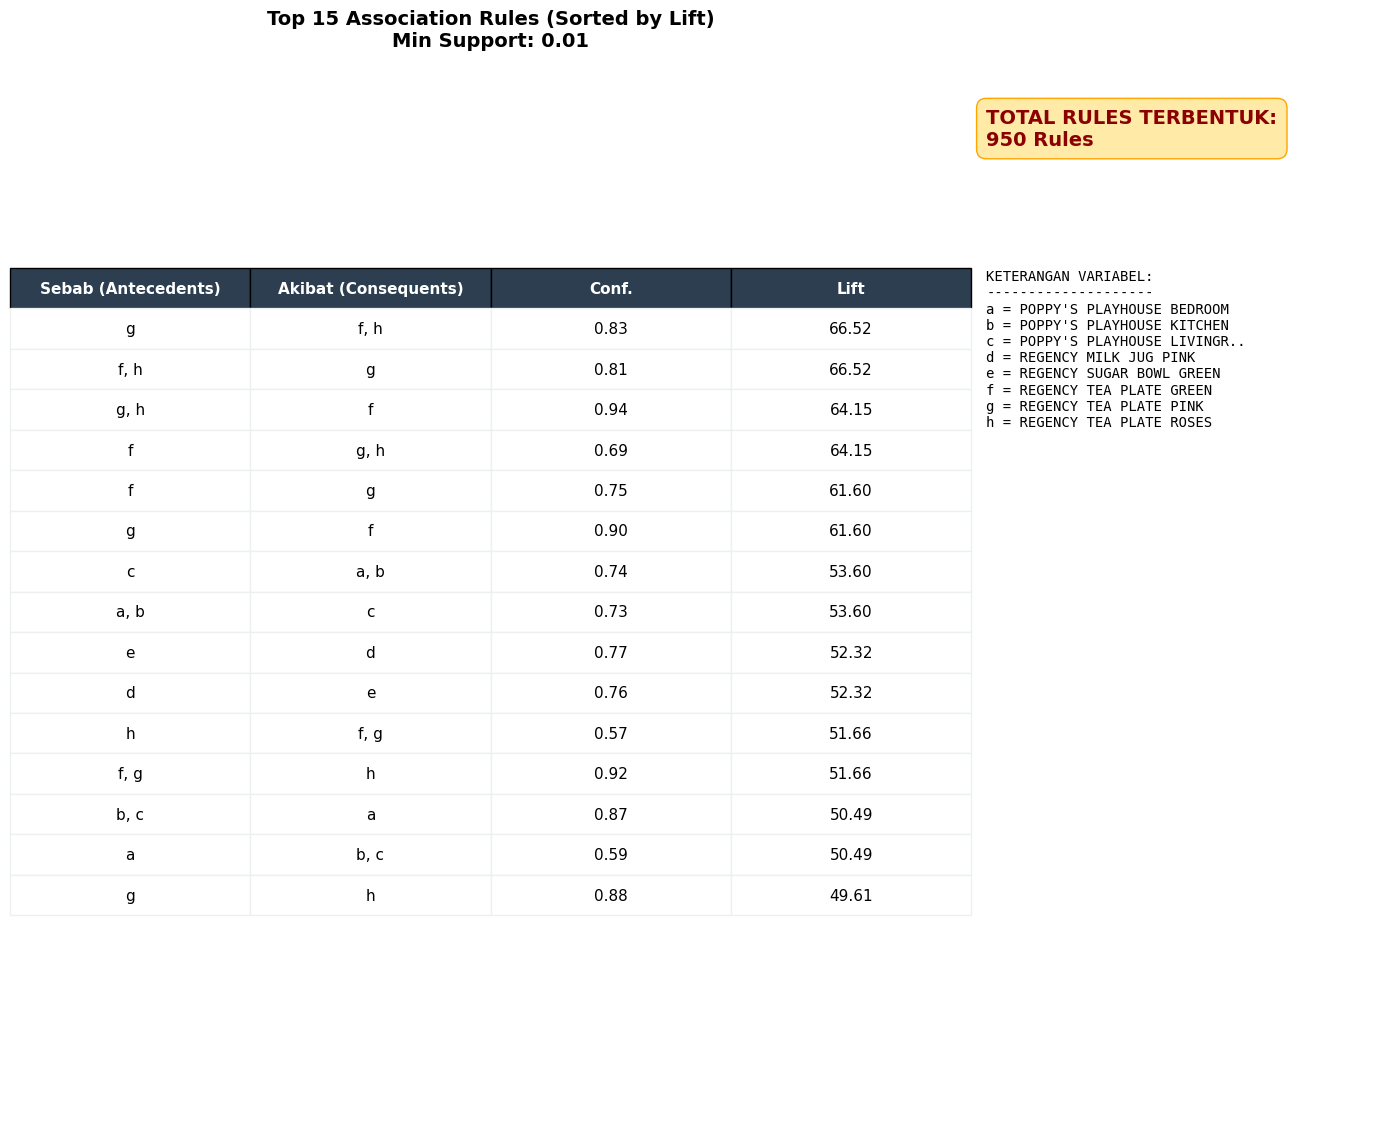


Membuat Grafik Perbandingan...


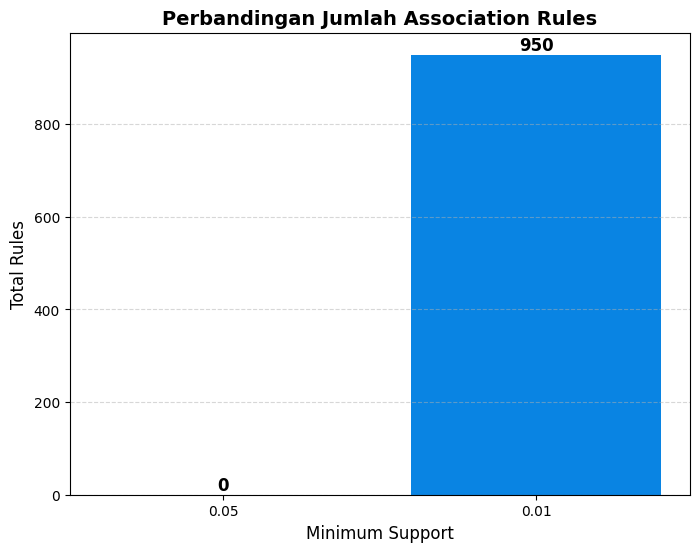

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

# --- 1. Persiapan Data ---
print("Sedang memuat data...")
# Pastikan path file benar
df = pd.read_csv('online_retail.csv', encoding='ISO-8859-1')

# Cleaning Data
df_clean = df.dropna(subset=['Description', 'CustomerID'])
df_clean = df_clean[~df_clean['InvoiceNo'].str.startswith('C')]
df_clean['Description'] = df_clean['Description'].str.strip()

# Membuat Basket
basket = df_clean.groupby(['CustomerID', 'InvoiceDate'])['Description'].apply(list).reset_index()

# Encoding
te = TransactionEncoder()
te_ary = te.fit(basket['Description']).transform(basket['Description'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print(f"Total Transaksi: {len(df_encoded)}")

# --- 2. Fungsi Visualisasi Tabel Rules ---

def plot_rules_table_custom(rules_df, total_rules_count, min_support_val):
    """
    Menampilkan Tabel Rules dengan Alias a,b,c
    Total Rules ditampilkan di ATAS KANAN (di atas legenda).
    """
    # Ambil Top 15 Rules berdasarkan Lift tertinggi untuk ditampilkan di tabel
    top_rules = rules_df.sort_values(by='lift', ascending=False).head(15).copy()
    
    # --- LOGIKA ALIAS (Lokal untuk Tabel ini) ---
    # Kumpulkan semua item unik yang ada di Top 15 Rules ini
    unique_items = set()
    for col in ['antecedents', 'consequents']:
        for itemset in top_rules[col]:
            unique_items.update(itemset)
    
    # Sort item agar urutan aliasnya rapi (a, b, c...)
    sorted_items = sorted(list(unique_items))
    
    # Buat Mapping Alias
    alias_map = {}
    letters = list(string.ascii_lowercase)
    for i, item in enumerate(sorted_items):
        alias = letters[i] if i < 26 else f"z{i}"
        alias_map[item] = alias

    # Fungsi helper untuk ubah {Roti, Susu} -> "a, b"
    def get_alias_str(itemset):
        sorted_sub = sorted(list(itemset))
        return ", ".join([alias_map[x] for x in sorted_sub])

    # Terapkan Alias ke DataFrame
    top_rules['Sebab (Antecedents)'] = top_rules['antecedents'].apply(get_alias_str)
    top_rules['Akibat (Consequents)'] = top_rules['consequents'].apply(get_alias_str)
    
    # Format Angka
    top_rules['Conf.'] = top_rules['confidence'].apply(lambda x: f"{x:.2f}")
    top_rules['Lift'] = top_rules['lift'].apply(lambda x: f"{x:.2f}")
    
    # Pilih kolom untuk ditampilkan
    display_data = top_rules[['Sebab (Antecedents)', 'Akibat (Consequents)', 'Conf.', 'Lift']]

    # --- PLOTTING ---
    plt.figure(figsize=(14, len(display_data)*0.5 + 4))
    
    # GridSpec: Kiri (Tabel), Kanan (Info & Legend)
    gs = plt.GridSpec(1, 2, width_ratios=[2.5, 1])
    ax_table = plt.subplot(gs[0])
    ax_info = plt.subplot(gs[1])
    
    ax_table.axis('off')
    ax_info.axis('off')
    
    # 1. Gambar Tabel
    the_table = ax_table.table(cellText=display_data.values,
                               colLabels=display_data.columns,
                               cellLoc='center', loc='center')
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(11)
    the_table.scale(1, 2)
    
    # Styling Header Tabel
    for (row, col), cell in the_table.get_celld().items():
        if row == 0:
            cell.set_text_props(weight='bold', color='white')
            cell.set_facecolor('#2c3e50') # Biru Gelap
        else:
            cell.set_edgecolor('#ecf0f1')

    ax_table.set_title(f"Top 15 Association Rules (Sorted by Lift)\nMin Support: {min_support_val}", 
                       fontsize=14, weight='bold')

    # 2. Bagian Kanan (INFO TOTAL & LEGEND)
    
    # A. Tampilkan TOTAL RULES di Paling Atas Kanan
    info_text = f"TOTAL RULES TERBENTUK:\n{total_rules_count} Rules"
    ax_info.text(0, 0.95, info_text, 
                 transform=ax_info.transAxes,
                 fontsize=14, weight='bold', color='darkred',
                 verticalalignment='top', horizontalalignment='left',
                 bbox=dict(boxstyle="round,pad=0.5", fc="#ffeaa7", ec="orange"))

    # B. Tampilkan Legenda di Bawahnya
    legend_text = "KETERANGAN VARIABEL:\n" + "-"*20 + "\n"
    for item in sorted_items:
        alias = alias_map[item]
        name = item[:25] + ".." if len(item) > 25 else item
        legend_text += f"{alias} = {name}\n"
        
    # Posisi y=0.80 (di bawah kotak total rules)
    ax_info.text(0, 0.80, legend_text, 
                 transform=ax_info.transAxes,
                 fontsize=10, family='monospace',
                 verticalalignment='top', horizontalalignment='left')

    plt.tight_layout()
    
    # Simpan Gambar
    filename = f"AssocRules_Table_Sup{min_support_val}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"  -> [Tabel Disimpan] {filename}")
    plt.show()

# --- 3. Eksekusi Utama ---

results_count = {}

for support in [0.05, 0.01]:
    print(f"\n--- Analisis Support {support} ---")
    
    # 1. Cari Frequent Itemset (FP-Growth)
    frequent_items = fpgrowth(df_encoded, min_support=support, use_colnames=True)
    
    if frequent_items.empty:
        print("  Tidak ada frequent itemset ditemukan.")
        results_count[str(support)] = 0
        continue
        
    # 2. Cari Association Rules
    # Syarat: Lift >= 1 (Hubungan positif) dan Confidence >= 0.5 (Cukup yakin)
    rules = association_rules(frequent_items, metric="lift", min_threshold=1.0)
    
    # Filter Confidence (Opsional, sesuaikan kebutuhan)
    # rules = rules[rules['confidence'] >= 0.5] 
    
    total_rules = len(rules)
    results_count[str(support)] = total_rules
    print(f"  Jumlah Rules ditemukan: {total_rules}")
    
    if total_rules > 0:
        plot_rules_table_custom(rules, total_rules, support)
    else:
        print("  Tidak ada rules yang memenuhi kriteria.")

# --- 4. Plot Perbandingan Jumlah Rules (Bar Chart) ---
print("\nMembuat Grafik Perbandingan...")
plt.figure(figsize=(8, 6))
bars = plt.bar(results_count.keys(), results_count.values(), color=['#ff7675', '#0984e3'])

plt.title("Perbandingan Jumlah Association Rules", fontsize=14, weight='bold')
plt.xlabel("Minimum Support", fontsize=12)
plt.ylabel("Total Rules", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Label Angka di atas batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=12, weight='bold')

plt.savefig("AssocRules_Comparison_Chart.png", dpi=300)
plt.show()

# Sequential Pattern

In [ ]:
basket = df_clean.groupby(['CustomerID', 'InvoiceDate'])['Description'].apply(list).reset_index()
basket.sort_values(by=['CustomerID', 'InvoiceDate'], inplace=True)

print("Contoh urutan belanja 5 pelanggan pertama:")
basket.head()

Contoh urutan belanja 5 pelanggan pertama:


,CustomerID,InvoiceDate,Description
0,12346.0,2011-01-18 10:01:00,[MEDIUM CERAMIC TOP STORAGE JAR]
1,12347.0,2010-12-07 14:57:00,"[BLACK CANDELABRA T-LIGHT HOLDER, AIRLINE BAG ..."
2,12347.0,2011-01-26 14:30:00,"[PINK NEW BAROQUECANDLESTICK CANDLE, BLUE NEW ..."
3,12347.0,2011-04-07 10:43:00,"[AIRLINE BAG VINTAGE JET SET WHITE, AIRLINE BA..."
4,12347.0,2011-06-09 13:01:00,"[RABBIT NIGHT LIGHT, REGENCY TEA STRAINER, REG..."
